# ConvNet 2

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras
from keras import models
from keras import layers
import tensorflow.keras.preprocessing
from tensorflow.keras.preprocessing import  image_dataset_from_directory

## Part 1 Data Augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by “augmenting” the samples via a number of random transformations that yield believable-looking images. The common-sense approach would be the manual creation of more images and applying small changes. However, it can be done easier and more efficiently in Keras, using ImageDataGenerator.

The goal is that at training time, our model would never see the exact same picture twice. It will change each image at the loading stage. This helps the model get exposed to more aspects of the data and generalize better. Below you can see an example. Where before we use only the rescale parameter, there are now several other random transformations: 

In [2]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

 These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally – relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

### Part 2 ConvNet 1 for small dataset

Having to train an image classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A “few” samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training – 1,000 for validation, and 1,000 for testing. 

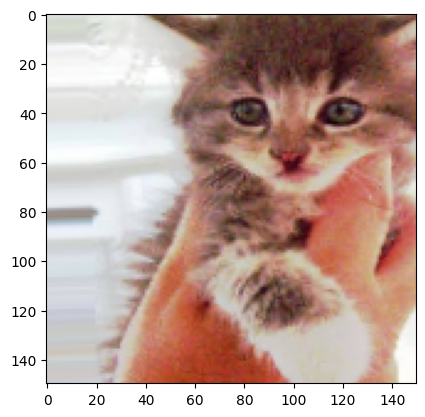

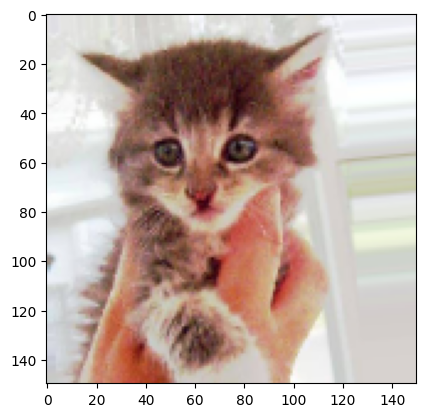

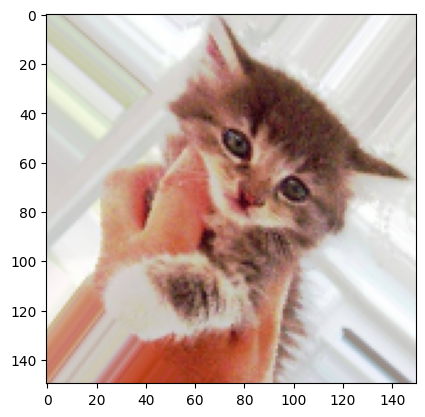

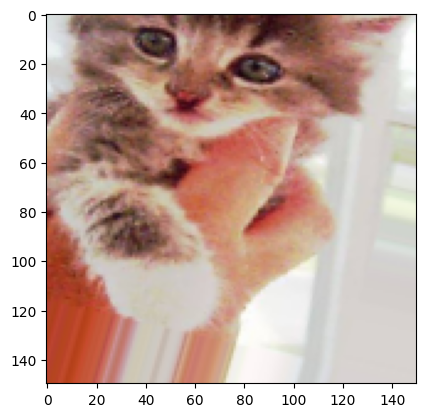

In [5]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from matplotlib import pyplot as plt
import os
 
train_cats_dir = R'data/train/cat/'

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = tensorflow.keras.utils.load_img(img_path, target_size=(150, 150))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = tensorflow.keras.utils.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tensorflow.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images, so the results won't be that much better.

### Dataset

Download the original dataset at https://www.kaggle.com/c/dogs-vs-cats/data (create a Kaggle account if you don't already have one).

If you use Google Colab and don't want to download the whole dataset on your computer, you can link a Kaggle account with Colab. For further information see link below: https://www.kaggle.com/general/74235

This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is ~800MB large (compressed). After downloading and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

As we only need 4000 images, you do not need to download the whole dataset. You can download only train set (~500MB large) or copy the first 4000 images from someone else in the group.

After downloading the data, you have to arrange them correctly in the catalogues. Data should be split into separate catalogs for dogs and for cats. You can do it manually or in python (for example using os and shutil libraries. 

main_directory/ <br>
...train/ <br>
......class_a/ <br>
.........a_image_1.jpg <br>
.........a_image_2.jpg <br>
......class_b/ <br>
.........b_image_1.jpg <br>
.........b_image_2.jpg <br>
...validation/ <br>
......class_a/ <br>
.........a_image_1.jpg <br>
.........a_image_2.jpg <br>
......class_b/ <br>
.........b_image_1.jpg <br>
.........b_image_2.jpg <br>

Please check the train/validation/test datasets. We now have 2000 training images, then 1000 validation images and 1000 test images (optional). In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate measure of success.

In [2]:
# #Create data augmentation as a separate model
 
# data_augmentation = models.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(factor=(-0.2, 0.3)),
#         # layers.RandomZoom(height_factor=(0.1, 0.2)),
#         layers.RandomContrast(factor=0.2)
#     ]
# )

#### Train the network using data augmentation: 

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = "data/train"
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_dir = "data/validation"
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Network architecture

You've already built a small convnet for MNIST in the previous exercise. You will reuse the same general structure: our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150×150 (a somewhat arbitrary choice), we end up with feature maps of size 7×7 right before the Flatten layer. Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148×148 to 7×7). This is a pattern that you will see in almost all convnets. Since we are attacking a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

Please create your network architecture based on the information above (4x Conv2d, 4x Maxpooling layers and then Flatten, 2 x Dense layer). 

In [7]:
# Nest data augmentation model as a layer

from keras import models
from keras import layers

image_height, image_width, image_channels = 150, 150, 3

filterSizeConv2D = 3, 3
filterSizePooling2D = 2, 2
number_of_channels = 32, 64, 128, 128, 512

model = models.Sequential()
# model.add(data_augmentation)
# model.add(layers.Rescaling(1/255, input_shape=(image_height, image_width, image_channels)))
model.add(layers.Conv2D(
    number_of_channels[0],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[1],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[2],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[3],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))

numberOfClasses = 1
model.add(layers.Flatten())
model.add(layers.Dense(number_of_channels[4], activation='relu')) # number_of_channels last conv2d
model.add(layers.Dense(numberOfClasses, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

 Compilation step:

* RMSprop optimizer - with learning rate parameter(lr=1e-4)
* Binary crossentropy loss funtion
* Accuracy metric


In [9]:
optimizerRMSprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizerRMSprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

Let's fit our model to the dataset. We may pass a validation_data argument. 

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 41s 402ms/step - loss: 0.6937 - accuracy: 0.5185 - val_loss: 0.6824 - val_accuracy: 0.5770
Epoch 2/30
100/100 [==============================] - 28s 276ms/step - loss: 0.6756 - accuracy: 0.5655 - val_loss: 0.6718 - val_accuracy: 0.5670
Epoch 3/30
100/100 [==============================] - 28s 277ms/step - loss: 0.6559 - accuracy: 0.5980 - val_loss: 0.6397 - val_accuracy: 0.6270
Epoch 4/30
100/100 [==============================] - 27s 274ms/step - loss: 0.6371 - accuracy: 0.6250 - val_loss: 0.6236 - val_accuracy: 0.6440
Epoch 5/30
100/100 [==============================] - 28s 276ms/step - loss: 0.6247 - accuracy: 0.6515 - val_loss: 0.6470 - val_accuracy: 0.6240
Epoch 6/30
100/100 [==============================] - 27s 275ms/step - loss: 0.6157 - accuracy: 0.6580 - val_loss: 0.5881 - val_accuracy: 0.6650
Epoch 7/30
100/100 [==============================] - 28s 278ms/step - loss: 0.6006 - accuracy: 0.6740 - val_loss: 0.6210 - val_ac

### Outcome analysis

Plot the loss and accuracy of the model over the training and validation data during training. 

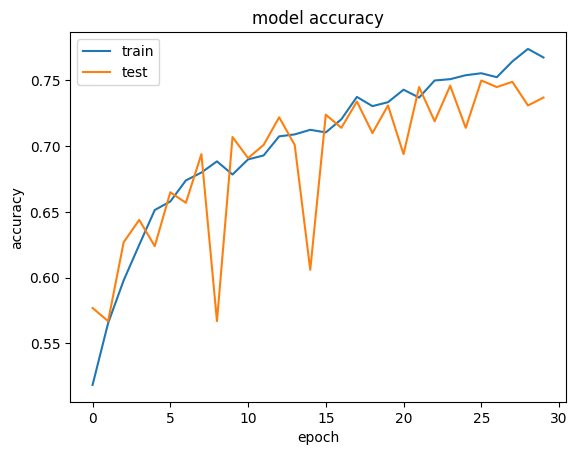

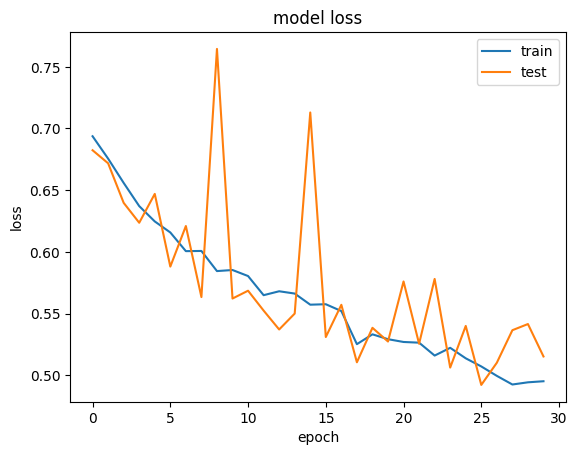

In [11]:
history_dict = history.history
history_dict.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Part 2 Adding Dropout Layer

A dropout layer is a very simple, yet quite counter-intuitive method. What it does is basically cutting off half of the connection between the layers. You may ask yourself a question - Why do I train the network so hard, only to randomly throw half of the information away? Surprisingly, this works. In many situations network is overfitting to the data so much, that randomly cutting 20%, 30%, or even 50% of connection during training phase will be beneficial.

Therefore, to further combat overfitting, we will also add a Dropout layer to our Dogs and Cats example. Please configure the model with the same four convolutional layers and four max-pooling layers like last week, but this time add the Dropout layer right before the densely-connected classifier (with parameter 0.5). 

In [12]:
# Nest data augmentation model as a layer

from keras import models
from keras import layers

image_height, image_width, image_channels = 150, 150, 3

filterSizeConv2D = 3, 3
filterSizePooling2D = 2, 2
number_of_channels = 32, 64, 128, 128, 512

model = models.Sequential()
# model.add(data_augmentation)
# model.add(layers.Rescaling(1/255, input_shape=(image_height, image_width, image_channels)))
model.add(layers.Conv2D(
    number_of_channels[0],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[1],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[2],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[3],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))

numberOfClasses = 1
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(number_of_channels[4], activation='relu')) # number_of_channels last conv2d
model.add(layers.Dense(numberOfClasses, activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [14]:
optimizerRMSprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizerRMSprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 34s 337ms/step - loss: 0.6915 - accuracy: 0.5215 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 33s 334ms/step - loss: 0.6796 - accuracy: 0.5720 - val_loss: 0.6803 - val_accuracy: 0.5470
Epoch 3/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6752 - accuracy: 0.5830 - val_loss: 0.7456 - val_accuracy: 0.5070
Epoch 4/30
100/100 [==============================] - 34s 342ms/step - loss: 0.6640 - accuracy: 0.5870 - val_loss: 0.6741 - val_accuracy: 0.5690
Epoch 5/30
100/100 [==============================] - 34s 336ms/step - loss: 0.6493 - accuracy: 0.6035 - val_loss: 0.6215 - val_accuracy: 0.6310
Epoch 6/30
100/100 [==============================] - 34s 337ms/step - loss: 0.6341 - accuracy: 0.6420 - val_loss: 0.6199 - val_accuracy: 0.6360
Epoch 7/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6165 - accuracy: 0.6655 - val_loss: 0.5871 - val_ac

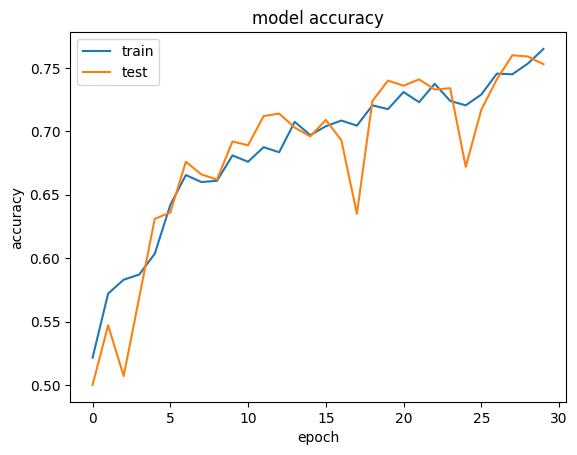

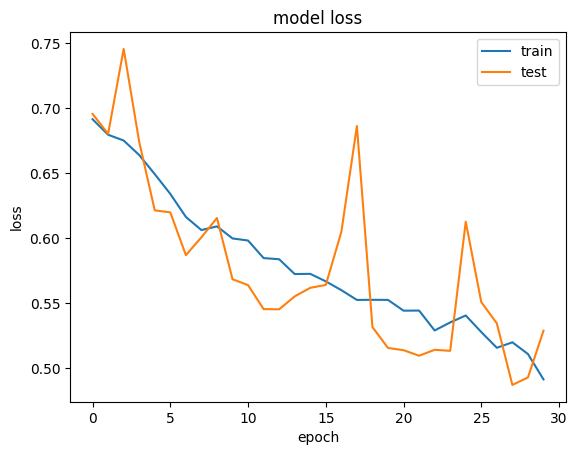

In [17]:
history_dict = history.history
history_dict.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Part 3* Dropout Layer without Data Augmentation

#### Network architecture

In [18]:
# Nest data augmentation model as a layer

from keras import models
from keras import layers

image_height, image_width, image_channels = 150, 150, 3

filterSizeConv2D = 3, 3
filterSizePooling2D = 2, 2
number_of_channels = 32, 64, 128, 128, 512

model = models.Sequential()
# model.add(data_augmentation)
model.add(layers.Rescaling(1/255, input_shape=(image_height, image_width, image_channels)))
model.add(layers.Conv2D(
    number_of_channels[0],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[1],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[2],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))
model.add(layers.Conv2D(
    number_of_channels[3],
    (filterSizeConv2D[0],
     filterSizeConv2D[1]),
     activation='relu',
     input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filterSizePooling2D[0], filterSizePooling2D[1])))

numberOfClasses = 1
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(number_of_channels[4], activation='relu')) # number_of_channels last conv2d
model.add(layers.Dense(numberOfClasses, activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)      

In [20]:
optimizerRMSprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizerRMSprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

#### Data preprocessing

In [21]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
 
train_dataset = image_dataset_from_directory(
    R"data/train",  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150, 150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)
 
val_dataset = image_dataset_from_directory(
    R"data/validation",  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150, 150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [22]:
history = model.fit(
      train_dataset,
      steps_per_epoch=100,
      epochs=30,
      validation_data=val_dataset,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 31s 303ms/step - loss: 0.6952 - accuracy: 0.5180 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 26s 264ms/step - loss: 0.6773 - accuracy: 0.5730 - val_loss: 0.6649 - val_accuracy: 0.5970
Epoch 3/30
100/100 [==============================] - 28s 277ms/step - loss: 0.6440 - accuracy: 0.6240 - val_loss: 0.6364 - val_accuracy: 0.6430
Epoch 4/30
100/100 [==============================] - 33s 325ms/step - loss: 0.6142 - accuracy: 0.6665 - val_loss: 0.6446 - val_accuracy: 0.6260
Epoch 5/30
100/100 [==============================] - 35s 347ms/step - loss: 0.5766 - accuracy: 0.7030 - val_loss: 0.6593 - val_accuracy: 0.6160
Epoch 6/30
100/100 [==============================] - 34s 335ms/step - loss: 0.5577 - accuracy: 0.7125 - val_loss: 0.5816 - val_accuracy: 0.6820
Epoch 7/30
100/100 [==============================] - 33s 333ms/step - loss: 0.5331 - accuracy: 0.7260 - val_loss: 0.5988 - val_ac

#### Outcome analysis

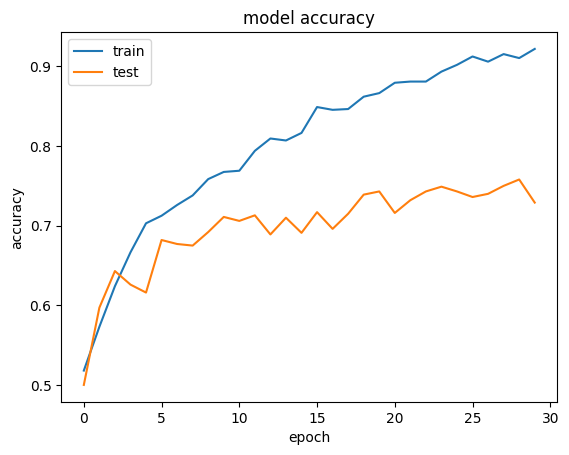

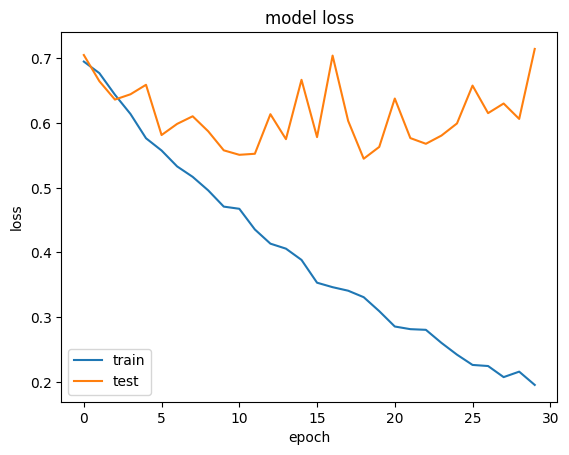

In [23]:
history_dict = history.history
history_dict.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()